In [1]:
%pylab inline
import pandas as pd
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = pd.read_csv('cjDatag.csv')

In [3]:
data

,SpecObjID,z,zErr,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,299489676975171584,0.021275,0.000009,17.15042,15.49709,14.67401,14.23429,13.90754
1,299489677444933632,0.021222,0.000009,17.15042,15.49709,14.67401,14.23429,13.90754
2,299489951853078528,0.213925,0.000052,20.43201,18.64892,17.46552,16.99866,16.67051
3,299489952322840576,0.203783,0.000039,21.33477,19.1311,17.71072,17.14913,16.75609
4,299490501608892416,0.126554,0.000062,20.77302,18.64713,17.30827,16.71435,16.21529
5,299490502078654464,0.064656,0.000021,19.50913,17.59275,16.67357,16.20524,15.83744
6,299490776486799360,0.448645,0.000168,25.34187,21.41487,19.63125,18.82388,18.31009
7,299491051364706304,0.055988,0.000011,null,null,null,null,null
8,299491051834468352,0.052654,0.000009,19.48928,18.32375,17.8396,17.52613,17.42273
9,299491326712375296,0.213861,0.000040,20.43201,18.64892,17.46552,16.99866,16.67051


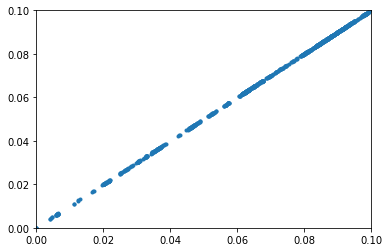

In [4]:
ylim(0,0.1)
xlim(0,0.1)
plot(data.z, data.z, '.')
show()

In [6]:
type(data.modelMag_u)

pandas.core.series.Series

# Új adat

In [2]:
data1 = pd.read_csv('mydata_hbendeguz.csv')
x1 = data1.modelMag_u
x2 = data1.modelMag_g
x3 = data1.modelMag_r
x4 = data1.modelMag_i
x5 = data1.modelMag_z

# Új modell

In [106]:
#hyperparameters
num_features = 5
num_h1 = 500
num_h2 = 250

delta = tf.constant(0.1)
learningrate = 0.012

epoch = 100000
num_total_data = 50000
num_training_set = 40000
num_test_set = num_total_data -num_training_set


In [107]:
xdata = tf.placeholder(dtype = tf.float32, shape = [num_features, 1])
ydata = tf.placeholder(dtype = tf.float32, shape = [1])

In [108]:
weights = {'h1' : tf.Variable(tf.truncated_normal(shape = [num_features, num_h1]), dtype = tf.float32),
          'h2' :tf.Variable(tf.truncated_normal(shape = [num_h1, num_h2]), dtype = tf.float32),
          'out' : tf.Variable(tf.truncated_normal(shape = [num_h2, 1]), dtype = tf.float32)}
biases = {'b1' :tf.Variable(tf.zeros(shape = [num_h1]), dtype = tf.float32),
         'b2' :tf.Variable(tf.zeros(shape = [num_h2]), dtype = tf.float32),
         'out' :tf.Variable(tf.zeros(shape = [1]), dtype = tf.float32)}

In [109]:
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(tf.transpose(xdata),(weights['h1'])), biases['b1']))
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
output = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])

In [110]:
loss = tf.multiply(tf.square(delta), tf.sqrt(1. +tf.square((ydata - output)/delta)) - 1.)#tf.sqrt(np.abs(tf.square(output)-tf.square((ydata))))
rmse = tf.reduce_mean(tf.square(ydata - output))
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate = learningrate)
train_step = my_optimizer.minimize(loss)

In [111]:
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

w_v = []
for i in range(epoch):
    rand_index = np.random.choice(num_training_set)
    x1rand = [x1[rand_index]]
    x2rand = [x2[rand_index]]
    x3rand = [x3[rand_index]]
    x4rand = [x4[rand_index]]
    x5rand = [x5[rand_index]]
    
    yrand = [data1.z[rand_index]]
    sess.run(train_step, feed_dict = {xdata: [x1rand,x2rand, x3rand, x4rand, x5rand ], ydata : yrand})
    if i % 10000 == 0 :
        print((sess.run(loss,feed_dict = {xdata: [x1rand,x2rand, x3rand, x4rand, x5rand ], ydata : yrand}) ),',')

[[0.0706163]] ,
[[0.00172737]] ,
[[0.00116135]] ,
[[0.00088759]] ,
[[0.00046246]] ,
[[0.00070284]] ,
[[0.00028916]] ,
[[0.00032999]] ,
[[0.00020984]] ,
[[0.00064691]] ,


In [112]:
k = 45510



result = sess.run(output, feed_dict = {xdata : reshape([x1[k], x2[k], x3[k], x4[k], x5[k]], (5,1)), ydata : reshape(data1.z[k], (1))})
print(result)
print(data1.z[k],data1.zErr[k] )

[[0.32796177]]
0.2937405 6.152366e-05


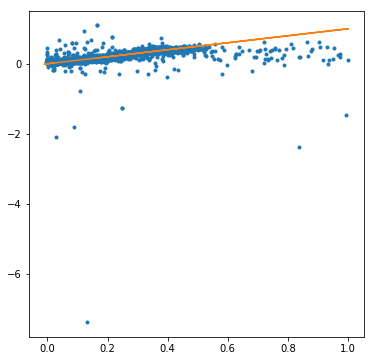

In [113]:
r = zeros(num_total_data)
for i in range(num_training_set, num_total_data):
    r[i] = sess.run(output, feed_dict = {xdata : reshape([x1[i], x2[i], x3[i], x4[i], x5[i]], (5,1)), ydata : reshape(data1.z[i], (1))})
figsize(6,6)
#xlim(-1,2)
#ylim(-1, 2)
plot(data1.z[num_training_set:num_total_data], r[num_training_set:num_total_data], '.', data1.z, data1.z)
show()

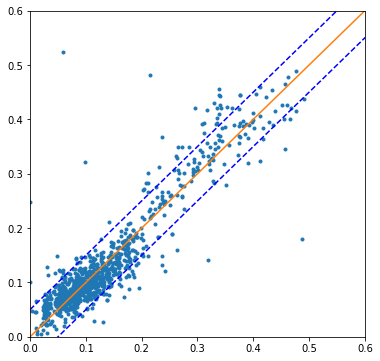

In [114]:
figsize(6,6)
xlim(0,0.6)
ylim(0, 0.6)
x = linspace(0, 2, 1000)
plot(data1.z[num_training_set:num_total_data:10], r[num_training_set:num_total_data:10],'.', x,x, x, x+0.05, 'b--', x, x-0.05,'b--' )
show()


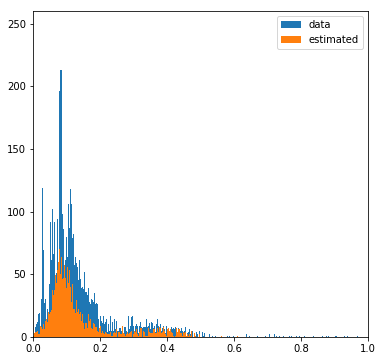

In [115]:
xlim(0,1)


a = hist(data1.z[num_training_set:num_total_data], 750, label ='data')
b = hist(r[num_training_set:num_total_data], 15000, label = 'estimated')

legend(loc='upper right')
show()

In [133]:
(data1.z[45000]-r[45000])/data1.z[45000]*100

1.0890502787359055

In [101]:
print(sess.run(rmse, feed_dict = {xdata : reshape([x1[i], x2[i], x3[i], x4[i], x5[i]], (5,1)), ydata : reshape(data1.z[i], (1))}))

0.0022120567


In [102]:
c = 0
for i in range(num_training_set, num_total_data):
    r[i] = sess.run(output, feed_dict = {xdata : reshape([x1[i], x2[i], x3[i], x4[i], x5[i]], (5,1)), ydata : reshape(data1.z[i], (1))})
    if abs(r[i]-data1.z[i]) > 1:
        print(data1.SpecObjID[i], data1.z[i], r[i], data1.modelMag_u[i],data1.modelMag_g[i], data1.modelMag_r[i], data1.modelMag_i[i]  )
        c=c+1

393074061044901888 0.1839446 -0.9794612526893616 19.50977 26.984240000000003 28.0878 21.9928
388453088400271360 0.12144010000000001 -2.1963233947753906 25.13331 19.17024 25.21419 24.58418
396394862548641792 0.3333751 -1.3077194690704346 28.210440000000002 28.60963 29.26865 17.26175
396398434367596544 0.579963 -1.3077194690704346 28.210440000000002 28.60963 29.26865 17.26175
350182386752841728 0.12374289999999999 -7.46321439743042 28.7491 17.05015 16.74788 15.39492
381846947696240640 0.08701199 -5.779307842254639 29.3403 17.646279999999997 16.66575 18.822110000000002
351320106812336128 0.1152974 -1.1409193277359009 19.18795 28.395909999999997 25.156589999999998 25.18671
370537926955657216 0.39956679999999994 2.579726457595825 17.18251 18.03531 16.74354 17.772679999999998
388519883731658752 0.05857534 -1.1262742280960083 23.49626 25.29659 24.86955 16.91856


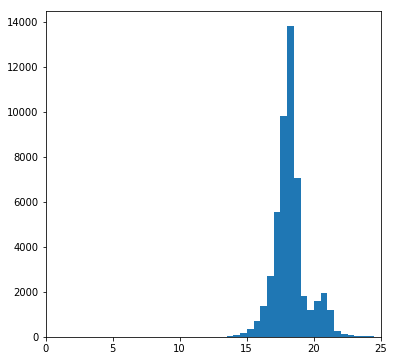

In [76]:
xlim(0, 25)
a = hist(data1.modelMag_g, bins =  20000)

In [15]:
print(c)

7


In [16]:
max(abs(data1.z-r))

7.511545178271485

In [ ]:
b =[[[0.59539145]] ,
[[0.00113958]] ,
[[5.182028e-06]] ,
[[0.00055654]] ,
[[0.00052539]] ,
[[0.00052115]] ,
[[4.5875313e-05]] ,
[[0.0004656]] ,
[[3.6597254e-07]] ,
[[0.00037451]] ,
[[0.00019549]] ,
[[0.00024385]] ,
[[0.00043429]] ,
[[1.4908314e-05]] ,
[[0.00038074]] ,
[[0.00010128]] ,
[[0.00021127]] ,
[[4.4584277e-07]] ,
[[0.00053595]] ,
[[0.00024191]] ,
[[0.00021455]] ,
[[0.00040808]] ,
[[4.209757e-05]] ,
[[0.00027517]] ,
[[8.875132e-05]] ,
[[1.6740561e-05]] ,
[[1.41704095e-05]] ,
[[2.0234585e-05]] ,
[[3.397465e-07]] ,
[[3.5656692e-05]] ,
[[0.00021072]] ,
[[0.00025931]] ,
[[1.5665293e-05]] ,
[[0.00018006]] ,
[[0.00020324]] ,
[[0.00019323]] ,
[[0.00011263]] ,
[[0.00128215]] ,
[[2.8504135e-05]] ,
[[6.6995625e-07]] ]
a = reshape((b), (40,1))
plot(a[1:], marker = 'o')

In [ ]:
a = pd.read_csv('MyTable_1_hbendeguz.csv')
a

# Régi, nem túl jól működő

In [177]:
w = tf.Variable(tf.truncated_normal(shape = [4, 4]), dtype = tf.float32)
b = tf.Variable(tf.zeros(shape = [4,1]), dtype = tf.float32)
w2 = tf.Variable(tf.truncated_normal(shape = [4, 1]), dtype = tf.float32)
b2 = tf.Variable(tf.zeros(shape = [1]), dtype = tf.float32)

In [183]:
first_layer = tf.nn.sigmoid(tf.add(tf.matmul(w,xdata),b))+1
second_layer = tf.add(tf.tensordot(tf.transpose(w2), first_layer, 1),b2)

ValueError: Dimensions must be equal, but are 4 and 5 for 'MatMul_35' (op: 'MatMul') with input shapes: [4,4], [5,1].

In [ ]:
first_layer

In [ ]:
second_layer

In [ ]:
loss = tf.sqrt(np.abs(tf.square(second_layer)-tf.square((ydata))))
my_optimizer = tf.train.AdamOptimizer(learning_rate = 0.00009)
train_step = my_optimizer.minimize(loss)

In [ ]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)
epoch = 80000
w_v = []
for i in range(epoch):
    rand_index = np.random.choice(2000)
    x1rand = [x1[rand_index]]
    x2rand = [x2[rand_index]]
    x3rand = [x3[rand_index]]
    x4rand = [x4[rand_index]]
    
    yrand = [data.z[rand_index]]
    sess.run(train_step, feed_dict = {xdata: [x1rand,x2rand, x3rand, x4rand ], ydata : yrand})
    

In [ ]:
#print(sess.run(w), sess.run(b))
result = sess.run(second_layer, feed_dict = {xdata : reshape([x1[3], x2[3], x3[3], x4[3]], (4,1)), ydata : reshape(data.z[3], (1))})

In [ ]:
data.z[3]

In [ ]:
print(str(result))

In [ ]:
r = zeros(2000)
for i in range(2000):
    r[i] = sess.run(second_layer, feed_dict = {xdata : reshape([x1[i], x2[i], x3[i], x4[i]], (4,1)), ydata : reshape(data.z[i], (1))})


In [ ]:
figsize(6,6)
xlim(0,0.35)
ylim(0, 0.35)
plot(data.z[:2000], r, '.')

In [ ]:
a = hist(data.z, 1000)